In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sn

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [3]:
classifications = model.predict(training_images)

In [4]:
classifications[0]

array([3.51043532e-08, 3.57991636e-09, 1.29463045e-08, 3.59569192e-08,
       1.98293549e-07, 1.59473450e-06, 4.41641845e-07, 2.45359889e-03,
       4.81817779e-07, 9.97543633e-01], dtype=float32)

In [5]:
training_labels[0]

9

In [6]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras


In [7]:
mnist = keras.datasets.fashion_mnist

In [8]:
(mnistrainX, mnistrainY), (mnistestX, mnistestY) = mnist.load_data()

In [9]:
mnistrainX = mnistrainX / 255
mnistestX = mnistestX / 255 

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(mnistrainX, mnistrainY, epochs=5)

test_loss = model.evaluate(mnistestX, mnistestY)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4988 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3742 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3124 - accuracy: 0.8853
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3392 - accuracy: 0.8776


In [11]:
classification = model.predict(mnistestX)

In [12]:
classification[2]

array([7.5789512e-07, 9.9999928e-01, 2.4426083e-10, 4.7548852e-08,
       1.5745454e-09, 9.0126035e-13, 2.9869462e-10, 7.2121623e-14,
       3.6355933e-12, 9.1882346e-14], dtype=float32)

In [13]:
mnistestY[2]

1

In [14]:
result = []
for each in classification:
  result.append(np.argmax(each))

In [22]:
conf =tf.math.confusion_matrix(mnistestY,result,num_classes=10)

In [23]:
conf = np.array(conf)

In [15]:
mnistestY.shape

(10000,)

In [17]:
classification.shape

(10000, 10)

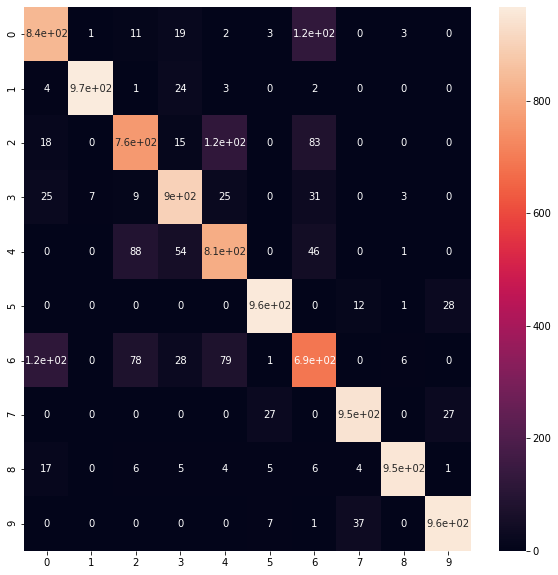

In [24]:
df_cm = pd.DataFrame(conf, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

In [25]:
conf

array([[836,   1,  11,  19,   2,   3, 125,   0,   3,   0],
       [  4, 966,   1,  24,   3,   0,   2,   0,   0,   0],
       [ 18,   0, 763,  15, 121,   0,  83,   0,   0,   0],
       [ 25,   7,   9, 900,  25,   0,  31,   0,   3,   0],
       [  0,   0,  88,  54, 811,   0,  46,   0,   1,   0],
       [  0,   0,   0,   0,   0, 959,   0,  12,   1,  28],
       [120,   0,  78,  28,  79,   1, 688,   0,   6,   0],
       [  0,   0,   0,   0,   0,  27,   0, 946,   0,  27],
       [ 17,   0,   6,   5,   4,   5,   6,   4, 952,   1],
       [  0,   0,   0,   0,   0,   7,   1,  37,   0, 955]], dtype=int32)